This data is from a Facebook ad campaign. The campaign is focused on customer acquisition versus brand awareness. The primary goal is “Website Registrations Completed” and the secondary goal is “Website Leads.” The target acquisition cost for the primary goal was $50 or less.

In [54]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Import data
ads = pd.read_csv("/Users/gabbynyirjesy/Downloads/QA HW Data.csv")

In [33]:
#Preview data
ads.head()

,Ad Set Name,Age,Gender,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,Ad Set 1,35-44,unknown,152,1.421053,3.12,216,14.444444,NaN,NaN,NaN,20.526316,NaN,NaN,1.0,NaN,5.0,NaN,NaN
1,Ad Set 1,35-44,female,6777,1.091486,101.53,7397,13.725835,21.0,4.834762,0.283899,14.981555,NaN,NaN,30.0,8.0,258.0,NaN,NaN
2,Ad Set 1,35-44,male,6041,1.191359,70.83,7197,9.841601,21.0,3.372857,0.291788,11.724880,NaN,5.0,50.0,18.0,283.0,NaN,14.166
3,Ad Set 1,25-34,unknown,314,1.000000,3.34,314,10.636943,1.0,3.340000,0.318471,10.636943,NaN,NaN,2.0,2.0,9.0,NaN,NaN
4,Ad Set 1,25-34,male,7184,1.092567,63.25,7849,8.058351,20.0,3.162500,0.254810,8.804287,NaN,2.0,36.0,28.0,218.0,NaN,31.625


In [41]:
#Since we are focusing on ad campaign success, identify how many unique ad campaigns are included in data
len(ads['Ad Set Name'].unique())

36

In [34]:
#Define functions
#Set of functions for data cleaning
class clean():
    '''
    Functions used to clean data sets. 
    to_binary: convert features consisting of only yes/no values to a binary indicator
    identify_uniform: Remove columns that contain only one value (ignoring N/A)
    identify_diverse_cat: Identify and/or delete columns above a specified limit of unique values
    lable_encoding: Label encode categorical variables
    
    '''
    
    def to_binary(df):
        '''
        Convert features consisting of only yes/no values to a binary indicator
        to_binary(df) --> df with yes/no columns converted to 1/0
        '''
        for col in df:
            if len(df[col].unique() == 2) and not df[col].isna().values.any():
                if 'No' in df[col].unique() and 'Yes' in df[col].unique():
                    df[col] = np.where(df[col] == 'No', 0, 1)
        return(df)
    
    def convert_to_float_try_except(col):
        '''
        Convert variable to float, with try-except loop to catch any type errors and set errors to zero
        convert_to_float_try_except(df, col) --> df with column converted to float
        '''
        try:
            new_col = float(col)
        except ValueError:
            new_col = 0
        new_col = float(new_col)
        return(new_col)

    def identify_uniform(df):
        '''
        Identify features that contain only one value (ignoring N/A)
        identify_uniform(df) --> list of uniform columns
        '''
        uniform_vars = []
        for col in df.columns:
            if len((df[col][df[col] != 'nan']).value_counts()) <= 1:
                uniform_vars.append(col)
        print('The following features are uniform:\n', uniform_vars)
        
        return(uniform_vars)
    
    def identify_diverse_cat(df, limit, delete):
        '''
        Identify and/or delete columns above a specified limit of unique values
        identify_diverse_cat(df, limit, delete) --> df
        '''
        cat_cols = list(df.select_dtypes(exclude=[np.number]).columns.values)
        
        for col in cat_cols:
            num_unique = len(list(df[col].unique()))
            if num_unique >= limit:
                if delete:
                    df = df.drop([col], axis=1)
                    print(f'{col} column was deleted becuase it had {num_unique} categories')
                else:
                    print(f'{col} column has {num_unique} categories and should be binned or transformed')
        return(df)
                
    
    def label_encoding(df):
        '''
        Label encode categorical variables
        label_encoding(df) --> df with categorical features label encoded
        '''
        label_encoder = LabelEncoder()
        categorical_list = list(df.select_dtypes(exclude=[np.number]).columns)
        for col in categorical_list:
            df[col] = df[col].apply(str)
            df[col] = label_encoder.fit_transform(df[col])
        return(df)
    
    def find_na_cols(df):
        '''
        Find columns that contain any n/a values
        find_na_cols(df) --> list of columns that contain n/a
        '''
        return(df.isna().any()[lambda x:x])
        

In [35]:
#View information on features and data types
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ad Set Name                                    259 non-null    object 
 1   Age                                            259 non-null    object 
 2   Gender                                         259 non-null    object 
 3   Reach                                          259 non-null    int64  
 4   Frequency                                      259 non-null    float64
 5   Amount Spent (USD)                             259 non-null    float64
 6   Impressions                                    259 non-null    int64  
 7   CPM (Cost per 1,000 Impressions) (USD)         259 non-null    float64
 8   Link Clicks                                    197 non-null    float64
 9   CPC (Cost per Link Click) (USD)                197 non

In [36]:
#Find all columns that contain n/a's
clean.find_na_cols(ads)

Link Clicks                                      True
CPC (Cost per Link Click) (USD)                  True
CTR (Link Click-Through Rate)                    True
Website Registrations Completed                  True
Website Leads                                    True
Post Shares                                      True
Post Comments                                    True
Post Reactions                                   True
Cost per Website Registration Completed (USD)    True
Cost per Website Lead (USD)                      True
dtype: bool

In [45]:
#Some of the columns containing n/a's can be imputed to zero:
impute_to_zero_cols = ['Link Clicks', 'Website Registrations Completed', 'Website Leads', 'Post Shares',
                       'Post Comments', 'Post Reactions']
ads[impute_to_zero_cols] = ads[impute_to_zero_cols].fillna(0)

In [47]:
#Confirm all columns identified were imputed to zero
clean.find_na_cols(ads)

CPC (Cost per Link Click) (USD)                  True
CTR (Link Click-Through Rate)                    True
Cost per Website Registration Completed (USD)    True
Cost per Website Lead (USD)                      True
dtype: bool

In [38]:
ads[ads['Link Clicks'].isna()].head()

,Ad Set Name,Age,Gender,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,Ad Set 1,35-44,unknown,152,1.421053,3.12,216,14.444444,NaN,NaN,NaN,20.526316,NaN,NaN,1.0,NaN,5.0,NaN,NaN
6,Ad Set 2,35-44,unknown,112,1.223214,2.97,137,21.678832,NaN,NaN,NaN,26.517857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ad Set 2,25-34,unknown,168,1.255952,4.25,211,20.142180,NaN,NaN,NaN,25.297619,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13,Ad Set 3,25-34,unknown,27,1.000000,0.55,27,20.370370,NaN,NaN,NaN,20.370370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Ad Set 3,35-44,unknown,19,1.000000,0.60,19,31.578947,NaN,NaN,NaN,31.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ads.describe()

,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
count,259.000000,259.000000,259.000000,259.000000,259.000000,197.000000,197.000000,197.000000,259.000000,100.00000,146.000000,119.000000,79.000000,161.000000,100.000000,146.000000
mean,3671.100386,1.010491,116.105869,4357.135135,29.040505,61.964467,4.003154,0.966756,28.929552,5.72000,14.013699,9.235294,5.037975,25.602484,64.394784,21.545448
std,7308.108027,0.356852,242.001466,9293.016793,12.884848,132.880158,2.653478,0.523315,12.652657,9.83303,29.016282,14.118569,5.499284,47.364449,42.744967,15.363916
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.866667,0.158228,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,9.030000,1.632500
25%,116.000000,1.000000,3.150000,134.500000,22.181900,4.000000,2.251429,0.671324,24.615377,1.00000,2.000000,1.500000,1.000000,2.000000,35.511250,11.653132
50%,936.000000,1.030817,32.490000,979.000000,28.022398,16.000000,3.323939,0.947867,30.113924,2.50000,5.000000,4.000000,3.000000,5.000000,50.271917,17.360556
75%,3762.000000,1.179984,96.515000,3986.000000,34.339459,53.000000,4.834762,1.215344,37.299423,5.25000,11.000000,9.000000,7.000000,28.000000,76.292500,26.556470
max,53824.000000,2.325893,2022.610000,66118.000000,140.000000,1021.000000,18.125000,4.545455,70.000000,72.00000,235.000000,100.000000,28.000000,283.000000,207.900000,101.480000


In [49]:
#View how many age groups are included
ads['Age'].unique()

array(['35-44', '25-34', '45-54', '65+', '55-64', '18-24'], dtype=object)

In [50]:
ads['Gender'].unique()

array(['unknown', 'female', 'male'], dtype=object)

In [53]:
ads['Ad Set Name'] = ads['Ad Set Name'].apply(lambda x: x.replace('Ad Set ',''))

In [135]:
x = pd.crosstab(ads['Age'], ads['Gender'], values = ads['Website Registrations Completed'], aggfunc=sum, margins=True)
x
x = ads[['Website Registrations Completed', 'Impressions', 'Gender', 'Age']].groupby(['Age','Gender']).sum()
x['conversion_percent'] = round(x['Website Registrations Completed']/x['Impressions']*100,2)
x = x.drop(['Website Registrations Completed', 'Impressions'], axis=1)
x.unstack('Gender')

conversion_percent              
Gender             female  male unknown
Age                                    
18-24                0.00  0.00     NaN
25-34                0.06  0.06    0.04
35-44                0.05  0.04    0.03
45-54                0.00  0.00    0.00
55-64                0.00  0.00    0.00
65+                  0.00  0.00     NaN

In [78]:
%matplotlib inline
def stacked_bar(df, x_var, category, values):
    '''
    Function to create a stacked bar chart with given x_var on x-axis, category as color coding,
    and values as summed feature on y-axis.
    '''
    ax = pd.crosstab(df[x_var], df[category], values = df[values], aggfunc=sum, margins=True)
    ax = ax.sort_values(by='All', ascending=False)
    ax = ax.drop('All', axis=1)
    ax = ax.drop('All', axis=0)
    ax.plot.bar(stacked=True)

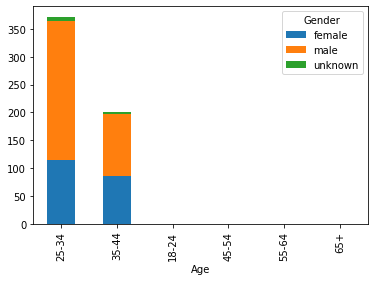

In [121]:
stacked_bar(ads, 'Ad Set Name', 'Gender', 'Website Registrations Completed')

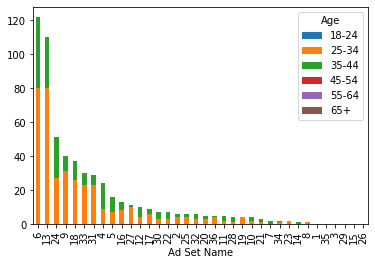

In [80]:
stacked_bar(ads, 'Ad Set Name', 'Age', 'Website Registrations Completed')

In [94]:
#Find the values for the funnel inputs
funnel_features = ["Impressions", "Link Clicks", "Website Leads", "Website Registrations Completed", 'Ad Set Name']
funnel_stats = ads[funnel_features].groupby('Ad Set Name').sum()
funnel_stats.head()

,Impressions,Link Clicks,Website Leads,Website Registrations Completed
Ad Set Name,,,,
1,29730,86.0,10.0,0.0
10,11317,110.0,20.0,4.0
11,9951,91.0,16.0,5.0
12,5985,34.0,12.0,10.0
13,130882,1877.0,422.0,110.0


In [119]:
data = funnel_stats.loc['13',:]

In [120]:
import plotly.express as px
from plotly import graph_objects as go
fig = go.Figure(go.Funnel(x=data.values, y=data.index, textinfo = "value+percent initial"))
fig.show()

Perform an analysis and visualization to show the relationship between registrations completed and specific age groups and ad campaigns.
Also include a bit about the acquisition cost

• Each ad set is targeting a unique audience (anonymous), within them they have groups
of ads that get distributed on a cost per impression basis.
• Reach: how many unique people are reached (not to be confused with impressions)
• Frequency: how many times on average someone within the ad set audience was
reached during the duration of the campaign.
• Amount Spend: dollars spent during duration of campaign
• Impressions: number of times the ad appeared in front of someone
• CTR: link clicks based on number of impressions (not reach)
• Post Share: they actually share the ad to all their friends
• Post Comment: they write something on an ad’s comments section
• Post Reaction: they “like” or “dislike” the ad